# Series de Taylor da Tangente

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

Aproximação da tangente por *Taylor* utilizando numero de *Bernoulli*
relativamente precisa para ate $6-8$ termos

In [17]:

def tan_Taylor(x0, n):
    somaTan = 0
    for i in range(1 , n + 1):
    #calculando numero de bernoulli que sao os coeficientes da serie de taylor de tan x
        B = 0
        numB = 2 * i
        for j in range (numB + 1):
            aux = 0
            for k in range(0, j + 1):
                aux += pow(-1, k) * math.factorial(j)  * pow(k, numB) / (math.factorial(k) * math.factorial(j - k))   

            B += aux / ((j + 1))

        somaTan =  np.add(somaTan, pow(-4, i) * (1 - pow(4, i)) * B * pow(x0, 2 * i - 1) / math.factorial(2 * i))
    return somaTan


Aproximaçao da tangente usando relações trigonométricas $\tan = \frac{\sin}{\cos}$ utilizamos as aproximações de seno e cosseno para o calculo 
precisão otima ate $15$ algarismos após a virgula usando $20$ termos

In [18]:
def tanSinCos(x0, n):
    tan = np.divide(seno(x0, n), cosseno(x0, n))
    return tan

#aproximação de cosseno usando taylor / maclaurin
def cosseno(x0, n):
  numerador = -np.multiply(x0,x0)
  denominador = 2.0
  cosseno = np.add(1.0, numerador/denominador) 

  for n in range(2, n):
    numerador = np.multiply(-numerador,np.multiply(x0,x0))
    denominador = 2*np.multiply(denominador,2*np.power(n,2)-n)
    cosseno = np.add(cosseno, np.divide(numerador,denominador))

  return cosseno

#aproximação de seno usando taylor / maclaurin
def seno(x0, n):
    seno = 0
    for i in range(n):
        sinal = (-1)**i  
        seno =np.add(seno,(x0**(2.0*i + 1))/math.factorial(2*i+1)*sinal)
    return seno
  

Printando e comparando os valores da tangente para *n* termos em um determinado    $x \geq 1$

In [19]:
print("Tangente numpy: %.20f" % np.tan(1))
tanExpansion = tan_Taylor(1, 6)
print("Tangente aproximada por Taylor usando Bernoulli: %.20f" %tanExpansion)
tanSC = tanSinCos(1, 20)
print("Tangente aproximada por Taylor usando  a aproximação de seno e cossseno: %.20f" %tanSC)

Tangente numpy: 1.55740772465490229237
Tangente aproximada por Taylor usando Bernoulli: 1.55136764543933813876
Tangente aproximada por Taylor usando  a aproximação de seno e cossseno: 1.55740772465490251442


Plotando as diferentes tangentes para diferentes *n* termos

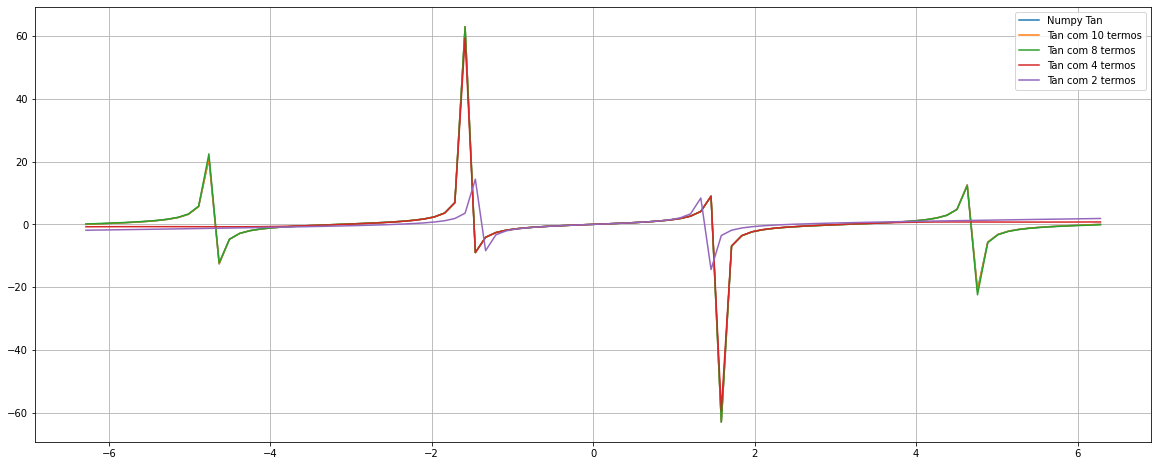

In [20]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

y1 = np.tan(x)
y2 = tanSinCos(x, 10)
y3 = tanSinCos(x, 8)
y4 = tanSinCos(x, 4)
y5 = tanSinCos(x, 2)

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.plot(x, y1,  label ="Numpy Tan")
ax.plot(x, y2,  label ="Tan com 10 termos")
ax.plot(x, y3,  label ="Tan com 8 termos")
ax.plot(x, y4,  label ="Tan com 4 termos")
ax.plot(x, y5,  label ="Tan com 2 termos")
ax.legend()
ax.grid()
plt.show()

Plotando incluindo Serie de Taylor da tangente usando Bernoulli

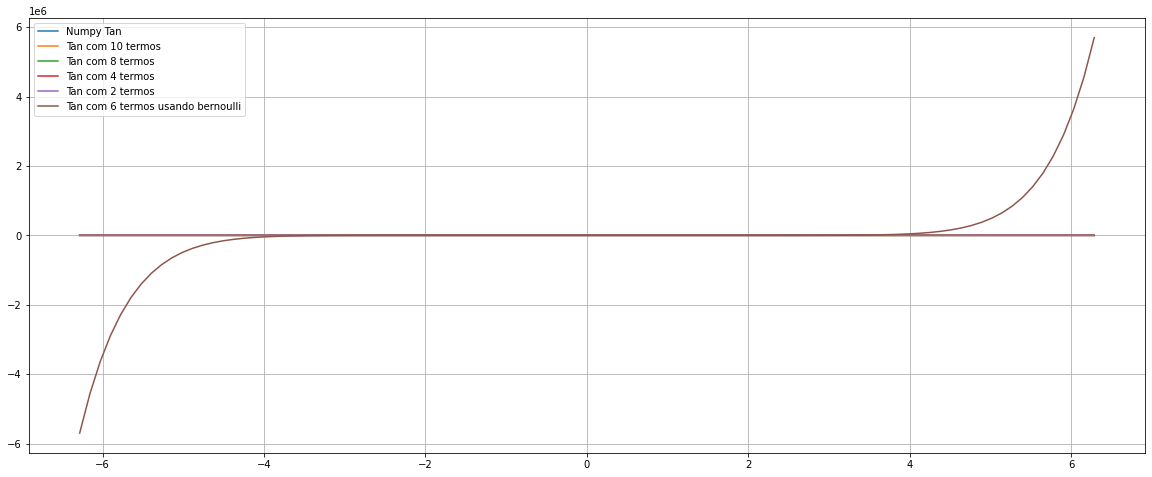

In [22]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

y1 = np.tan(x)
y2 = tanSinCos(x, 10)
y3 = tanSinCos(x, 8)
y4 = tanSinCos(x, 4)
y5 = tanSinCos(x, 2)
y6 = tan_Taylor(x, 6)
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.plot(x, y1,  label ="Numpy Tan")
ax.plot(x, y2,  label ="Tan com 10 termos")
ax.plot(x, y3,  label ="Tan com 8 termos")
ax.plot(x, y4,  label ="Tan com 4 termos")
ax.plot(x, y5,  label ="Tan com 2 termos")
ax.plot(x, y6,  label ="Tan com 6 termos usando bernoulli")


ax.legend()
ax.grid()
plt.show()